# Phase N=°1

In [1]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## 1-Faites une analyse exploratoire des données:¶
(valeurs manquantes, données redondantes,transformations des données,...etc.).

In [47]:
#lire la base de données à partir du fichier csv
df=pd.read_csv('Phase1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13599 non-null  int64  
 1   duration                     13599 non-null  int64  
 2   protocol_type                13599 non-null  object 
 3   service                      13599 non-null  object 
 4   flag                         13599 non-null  object 
 5   src_bytes                    13599 non-null  int64  
 6   dst_bytes                    13599 non-null  int64  
 7   land                         13599 non-null  int64  
 8   wrong_fragment               13599 non-null  int64  
 9   urgent                       13599 non-null  int64  
 10  hot                          13599 non-null  int64  
 11  num_failed_logins            13599 non-null  int64  
 12  logged_in                    13599 non-null  int64  
 13  num_compromised 

In [48]:
#dimensions : nombre de lignes, nombre de colonnes
#la ligne d'en-tête n'est pas comptabilisée
#dans le nombre de lignes
print(df.shape)

(13599, 43)


In [49]:
#Class Target Elle contient Quoi?
df['class'].value_counts()

normal     13449
anomaly      150
Name: class, dtype: int64

In [50]:
#Afficher les statistiques 
df.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,13599.000000,13599.000000,1.359900e+04,1.359900e+04,13599.000000,13599.000000,13599.0,13599.000000,13599.000000,13599.000000,...,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000
mean,12495.645636,182.747776,1.164666e+04,4.352227e+03,0.000074,0.001177,0.0,0.222149,0.001177,0.701669,...,149.209795,187.626664,0.803486,0.041635,0.121749,0.025695,0.021073,0.013594,0.046417,0.044595
std,7333.313621,1371.063164,1.723699e+05,6.941981e+04,0.008575,0.058150,0.0,2.340105,0.043711,0.457542,...,101.645694,94.248057,0.331422,0.130418,0.255221,0.068712,0.122787,0.101307,0.195325,0.191117
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6113.500000,0.000000,1.050000e+02,8.100000e+01,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,41.000000,110.000000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12521.000000,0.000000,2.320000e+02,3.700000e+02,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,161.000000,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18848.000000,0.000000,3.240000e+02,2.009000e+03,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,255.000000,255.000000,1.000000,0.020000,0.080000,0.030000,0.000000,0.000000,0.000000,0.000000
max,25186.000000,36613.000000,7.665876e+06,5.131424e+06,1.000000,3.000000,0.0,77.000000,3.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#Supprimer la colonnes Unnamed Génerer sans aucune Information
df = df.drop(['Unnamed: 0'],axis = 1)
df = df.drop(['urgent'],axis = 1)

In [52]:
df.head(13599)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,http,SF,287,2251,0,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,tcp,uucp,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
13595,0,tcp,exec,RSTO,0,0,0,0,0,0,...,9,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
13596,0,tcp,netbios_dgm,S0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
13597,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,anomaly


In [53]:
#Mélanger le dataset pour assurer dans la phase de découpage j'ai les 2 Type anomaly et normal
#from sklearn.utils import shuffle
#df = shuffle(df)
#df

pré_traitement 

In [54]:
#les valeur manquantes
df.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
srv_rerror_rate                False
s

In [55]:
#Voir les Répition des lignes
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13594    False
13595    False
13596    False
13597    False
13598    False
Length: 13599, dtype: bool

In [56]:
df[df.duplicated()].head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class


c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dst_host_serror_rate'>

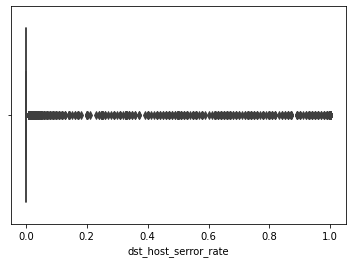

In [57]:
#chercher les donnes abérente normalment en vérifier tout les colonnes dans le principe de data scientist
import seaborn as sns
import os
sns.boxplot(df['dst_host_serror_rate'])

c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wrong_fragment'>

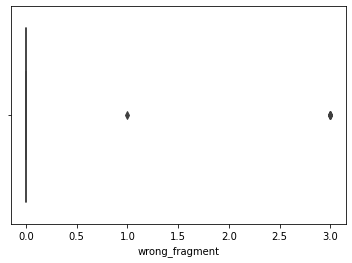

In [58]:
sns.boxplot(df['wrong_fragment'])#C'est pas une donnés abé car elle a uniquement 2 val

c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_host_login'>

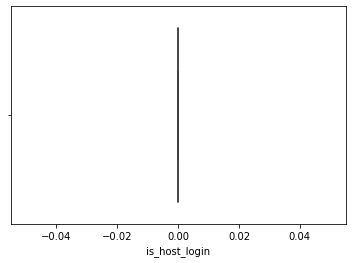

In [59]:
sns.boxplot(df['is_host_login'])

c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='srv_count'>

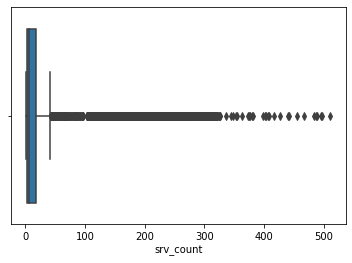

In [60]:
sns.boxplot(df['srv_count'])

c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='root_shell'>

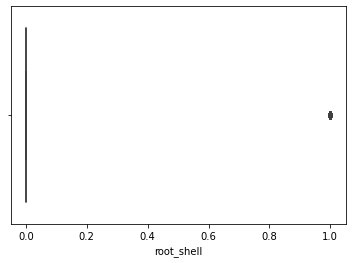

In [61]:
sns.boxplot(df['root_shell'])

In [62]:
df['dst_host_serror_rate'].describe()

count    13599.000000
mean         0.021073
std          0.122787
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_serror_rate, dtype: float64

In [63]:
#afficher les variables catégorique 
df.describe(include='O')

,protocol_type,service,flag,class
count,13599,13599,13599,13599
unique,3,51,10,2
top,tcp,http,SF,normal
freq,10807,7566,12693,13449


In [64]:
#changer les variable de type objet 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['protocol_type']= le.fit_transform(df['protocol_type']) 
df['service']= le.fit_transform(df['service'])
df['flag']= le.fit_transform(df['flag'])
df['class']= le.fit_transform(df['class'])


## 2-Algorithme D'apprentissage

In [65]:
##Récupérer toutes les lignes et toutes les colonnes sauf class
X = df.drop('class', axis= 1)
#Récupérer la colonne class qui représente le target et stocker la dans la vaiable y
y = df['class']


In [66]:
#afficher Y
y

0        1
1        1
2        1
3        1
4        1
        ..
13594    0
13595    0
13596    0
13597    0
13598    0
Name: class, Length: 13599, dtype: int32

In [67]:
##Décomposer le dataset en 30% pour le test et 70% pour le train
from sklearn.model_selection import train_test_split
X = df.drop('class', axis= 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=0)

In [68]:
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [69]:
from sklearn import neighbors, metrics
from sklearn import model_selection


In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1]}

In [81]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)


In [82]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1]}, scoring='accuracy')

In [83]:
y_pred = clf.predict(X_test)

## 3-Fonction de Matrice de Confusion(FN,FV,VN,VP)

In [84]:
from sklearn.metrics import confusion_matrix


In [85]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn import metrics
print (classification_report(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        45
           1       1.00      1.00      1.00      4035

    accuracy                           1.00      4080
   macro avg       0.95      0.90      0.92      4080
weighted avg       1.00      1.00      1.00      4080

[[  36    9]
 [   4 4031]]


In [86]:

def perf_measure(y_test, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    CM = confusion_matrix(y_test,y_pred)
    TN = CM [0][0]
    TP = CM [1][1]
    FN = CM [0][1]
    FP = CM [1][0]
   
    return(TP, FP, TN, FN)

In [87]:
print ('TP, FP, TN et FN sont :',perf_measure(y_test, y_pred))


TP, FP, TN et FN sont : (4031, 4, 36, 9)


## 4-La Précision,Le Rappel,Le F1

In [88]:

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , precision_score
accurancy = accuracy_score(y_test, y_pred)
print ('Accuracy:', accurancy)
f1_score = f1_score(y_test, y_pred,average='weighted')
print ('f1_score:',f1_score)
recall = recall_score(y_test, y_pred, average='weighted')
print ('recall_score:', recall)
print('precision=',precision_score(y_test,y_pred))

Accuracy: 0.9968137254901961
f1_score: 0.9967209979967218
recall_score: 0.9968137254901961
precision= 0.9977722772277228


## 5-Le Modéle donne t'il de bonne résultat?

Vu que la question 4 a donner des résultat proche de 1 alors oui le modéle donne de bonne résultat 

In [79]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,15,8,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,32,8,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,18,8,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
3,0,1,18,8,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4,0,1,18,8,287,2251,0,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,1,47,4,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
13595,0,1,12,2,0,0,0,0,0,0,...,9,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
13596,0,1,29,4,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
13597,0,0,10,8,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0


# D'après votre analyse, de quel problème s'agit-il?


D'aprés notre analyse nous remarquons qu'il ya u  manque en ce qui concerne le type anomaly, on revenos sur entre 85 anomaly et inferiur par rapport a normal.